# Org 5

## Defaults By Income 

datawork.mk_critical_info - hb2_nmi, /tuca/scores/00093
datawork.mk_application_more - mk_TU_risk_Oct2022_score, channel_hb

A failure to meet the legal obligations of a loan, which means the borrower has missed payments or has otherwise failed to fulfill the loan agreement. 
- 'isFPD = 0' no default on first payment; 
- 'isFPD = 1' default on first payment, 
- 'isFPD = 2' exception case which we want to exclude from the analysis

Trends of defaults by income (nmi HB2) in FORA (org 5), measure against scores. 

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import pymysql
import numpy as np
from time import perf_counter
import time
import helper_functions as hf

In [3]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
limit = 2627345182 ## 2024-05-17
difference = 200000
lower = 2561893664 ## 2023-08-02
upper = lower+difference

i=0
timestart = time.time()
while lower <= limit:
    time0=time.time()
    temp = pd.read_sql("""
    SELECT lead_sequence_id, organization_id, campaign_name, insert_date, decision, rule_description, lead_source_id, lead_provider_name
    FROM datawork.mk_application
    WHERE lead_sequence_id > """ + str(lower) + """
    AND lead_sequence_id <= """ + str(upper) + """
    AND organization_id in (5)
    AND decision = 'ACCEPT'
    
    ;""", con=conn)
    
    lower = lower + difference
    upper = upper + difference
    
    if i==0:
        leads_a = temp.copy()
    else:
        leads_a = pd.concat([leads_a, temp], ignore_index=True)
    i+=1    
    print(time.time()-time0)
    print(temp.shape)
    print("lower:",lower)
    
conn.close()

print('total time: ', time.time()-timestart)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/869881891.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""


7.52603006362915
(25, 8)
lower: 2562093664
6.045815944671631
(23, 8)
lower: 2562293664
6.651458740234375
(25, 8)
lower: 2562493664
6.25029182434082
(23, 8)
lower: 2562693664
6.042050123214722
(41, 8)
lower: 2562893664
5.626766204833984
(36, 8)
lower: 2563093664
5.8421630859375
(28, 8)
lower: 2563293664
6.037183046340942
(28, 8)
lower: 2563493664
4.744520902633667
(28, 8)
lower: 2563693664
4.471397161483765
(37, 8)
lower: 2563893664
3.4333009719848633
(29, 8)
lower: 2564093664
3.2235870361328125
(39, 8)
lower: 2564293664
2.951231002807617
(26, 8)
lower: 2564493664
3.191969871520996
(23, 8)
lower: 2564693664
2.768770933151245
(27, 8)
lower: 2564893664
2.8397738933563232
(38, 8)
lower: 2565093664
2.8904449939727783
(34, 8)
lower: 2565293664
2.8670315742492676
(29, 8)
lower: 2565493664
2.866542100906372
(32, 8)
lower: 2565693664
2.811940908432007
(32, 8)
lower: 2565893664
2.820477247238159
(25, 8)
lower: 2566093664
2.8717730045318604
(21, 8)
lower: 2566293664
2.722378969192505
(21, 8)
lowe

2.8683788776397705
(46, 8)
lower: 2599093664
2.7523350715637207
(69, 8)
lower: 2599293664
2.8724937438964844
(63, 8)
lower: 2599493664
2.963555097579956
(57, 8)
lower: 2599693664
2.878108024597168
(78, 8)
lower: 2599893664
2.862528085708618
(168, 8)
lower: 2600093664
2.7066280841827393
(49, 8)
lower: 2600293664
2.8271899223327637
(59, 8)
lower: 2600493664
2.8652658462524414
(44, 8)
lower: 2600693664
2.8639700412750244
(43, 8)
lower: 2600893664
2.778988838195801
(45, 8)
lower: 2601093664
2.8593850135803223
(50, 8)
lower: 2601293664
2.8379170894622803
(42, 8)
lower: 2601493664
2.7622551918029785
(79, 8)
lower: 2601693664
2.79451584815979
(45, 8)
lower: 2601893664
2.866438150405884
(46, 8)
lower: 2602093664
2.7358570098876953
(55, 8)
lower: 2602293664
2.7399120330810547
(59, 8)
lower: 2602493664
2.819912910461426
(37, 8)
lower: 2602693664
2.866795063018799
(86, 8)
lower: 2602893664
2.7942006587982178
(60, 8)
lower: 2603093664
2.8378419876098633
(44, 8)
lower: 2603293664
2.8659279346466064

In [4]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, mk_TU_risk_Oct2022_score as TUrs
    FROM datawork.mk_application_more 
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        TUrs_df = temp.copy()
    else:
        TUrs_df = pd.concat([TUrs_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/1070603417.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


1.2583386898040771
0
(372, 2)
0.6993968486785889
1
(372, 2)
0.6308619976043701
2
(372, 2)
0.7150411605834961
3
(372, 2)
0.6209609508514404
4
(372, 2)
0.7100389003753662
5
(372, 2)
0.613731861114502
6
(372, 2)
0.7156116962432861
7
(372, 2)
0.7106990814208984
8
(372, 2)
0.5124380588531494
9
(372, 2)
0.2897789478302002
10
(372, 2)
0.28920698165893555
11
(372, 2)
0.2943689823150635
12
(372, 2)
0.28934311866760254
13
(372, 2)
0.29273390769958496
14
(372, 2)
0.29699110984802246
15
(372, 2)
0.28922080993652344
16
(372, 2)
0.2930281162261963
17
(372, 2)
0.3017401695251465
18
(372, 2)
0.2962758541107178
19
(372, 2)
0.2902681827545166
20
(372, 2)
0.2965841293334961
21
(372, 2)
0.297029972076416
22
(372, 2)
0.2969520092010498
23
(372, 2)
0.29416990280151367
24
(372, 2)
0.30625081062316895
25
(372, 2)
0.3056507110595703
26
(372, 2)
0.29221391677856445
27
(372, 2)
0.3024861812591553
28
(372, 2)
0.29073405265808105
29
(372, 2)
0.297199010848999
30
(372, 2)
0.2968289852142334
31
(372, 2)
0.2935729026

In [5]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, hb2_nmi, `/tuca/scores/00093` as bureau_score
    FROM datawork.mk_critical_info
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        nmi_df = temp.copy()
    else:
        nmi_df = pd.concat([nmi_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.2052140235900879
0
(0, 3)
0.20177292823791504
1
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""
/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20138812065124512
2
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20171904563903809
3
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20464205741882324
4
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20593619346618652
5
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20677399635314941
6
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.44640016555786133
7
(136, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3441653524.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nmi_df = pd.concat([nmi_df, temp], ignore_index=True)


0.9262857437133789
8
(372, 3)
0.9210832118988037
9
(372, 3)
0.7417337894439697
10
(372, 3)
0.7066140174865723
11
(372, 3)
0.9024438858032227
12
(372, 3)
0.8592221736907959
13
(372, 3)
0.8776397705078125
14
(372, 3)
0.7147712707519531
15
(372, 3)
0.7119238376617432
16
(372, 3)
0.7439432144165039
17
(372, 3)
0.6956791877746582
18
(372, 3)
0.6713402271270752
19
(359, 3)
0.6844658851623535
20
(372, 3)
0.7900838851928711
21
(372, 3)
0.7689821720123291
22
(372, 3)
0.7705550193786621
23
(372, 3)
0.6784439086914062
24
(372, 3)
0.8474900722503662
25
(372, 3)
0.7329769134521484
26
(372, 3)
0.7438929080963135
27
(372, 3)
0.6702091693878174
28
(372, 3)
0.7089252471923828
29
(372, 3)
0.7867658138275146
30
(372, 3)
0.6763691902160645
31
(372, 3)
0.7623918056488037
32
(372, 3)
0.824105978012085
33
(372, 3)
0.7351000308990479
34
(372, 3)
0.7178101539611816
35
(372, 3)
0.7121841907501221
36
(372, 3)
0.7120888233184814
37
(372, 3)
0.7170171737670898
38
(372, 3)
0.7144477367401123
39
(372, 3)
0.716084957

In [6]:
leads_a.lead_provider_name.value_counts()

lead_provider_name
Loans Canada     12771
Fora Internal     2170
LoanConnect       1782
Borrowell         1383
Smarter Loans      478
Loanz CA            12
FORA-TEST            8
Name: count, dtype: int64

In [7]:
leads_more = pd.merge(left=leads_a, right=TUrs_df, on='lead_sequence_id', how='left')
leads_more = pd.merge(left=leads_more, right=nmi_df, on='lead_sequence_id', how='left')
leads_more.shape

(18604, 11)

In [8]:
fpd_df = hf.get_more_fpd(leads_a)

We will excecute 1 iterations:



/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  2
Runtime:  5.094048023223877


/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  57
Runtime:  2.5544800758361816


drop all exceptions => drop all when isFPD = 2

In [9]:
fpd_df = fpd_df[fpd_df['isFPD'] != 2]

In [10]:
fpd_df.head()

,lead_sequence_id,item_date,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD
0,2561896639,2023-08-25,6917311,cleared,ach,37.73,1,4119923,5536113,0
1,2561906917,2023-08-24,6914856,cleared,ach,40.55,1,4120157,5536400,0
2,2561929488,2023-08-24,6915389,cleared,ach,21.42,1,4120494,5536834,0
3,2562004726,2023-08-31,6917083,cleared,ach,63.23,1,4121503,5538096,0
4,2562034383,2023-08-18,6918475,cleared,ach,14.10,1,4121959,5538647,0


In [11]:
fpd_df.shape

(4761, 10)

In [12]:
final_df = pd.merge(left=leads_more, right=fpd_df, on='lead_sequence_id', how='left')
final_df.shape

(18772, 20)

In [13]:
final_df.head()

,lead_sequence_id,organization_id,campaign_name,insert_date,decision,rule_description,lead_source_id,lead_provider_name,TUrs,hb2_nmi,bureau_score,item_date,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD
0,2561895653,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:22:49,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2561896639,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:33:45,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,703.0,NaN,NaN,2023-08-25,6917311.0,cleared,ach,37.73,1.0,4119923.0,5536113.0,0.0
2,2561898457,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:56:37,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2561900838,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 01:32:09,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2561902931,5,#FORA-LOANSCANADA-CPF-SF#,2023-08-02 02:06:47,ACCEPT,IDC Pass,2412,Loans Canada,629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
final_df = final_df[final_df['lead_provider_name'] != 'FORA-TEST']

In [15]:
final_df = final_df[final_df['lead_provider_name'] != 'Loanz CA']

In [16]:
final_df.lead_provider_name.value_counts()

lead_provider_name
Loans Canada     12874
Fora Internal     2204
LoanConnect       1794
Borrowell         1399
Smarter Loans      481
Name: count, dtype: int64

In [17]:
final_df.organization_id.value_counts()

organization_id
5    18752
Name: count, dtype: int64

In [18]:
final_df.isFPD.value_counts()

isFPD
0.0    4595
1.0     158
Name: count, dtype: int64

In [65]:
def create_decile_buckets(df, score_column, nmi_column, fpd_column):
    df['decile'] = pd.qcut(df[score_column], 20, labels=False) + 1
    # use pivot to restructure df so that default and non default counts means and stds are in separate columns
    income_stats = df.groupby(['decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='decile', columns=fpd_column, values = ['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    score_stats = df.groupby('decile')[score_column].agg(['min', 'max']).reset_index()
    
    ##total_counts = df.groupby(['decile', fpd_column])[score_column].count().unstack(fill_value=0)
    ##total_counts.columns = ['non_default', 'default']
    ##total_counts['total'] = total_counts['non_default'] + total_counts['default']
    
    ##total_counts['default_rate'] = total_counts['default'] / total_counts['total'] * 100
    result = pd.merge(score_stats, income_stats_pivot, on='decile')
    return result

tu_decile_stats = create_decile_buckets(final_df, 'TUrs', 'hb2_nmi', 'isFPD')
bureau_decile_stats = create_decile_buckets(final_df, 'bureau_score', 'hb2_nmi', 'isFPD')

### TU score and Vantage Score buckets with nmi

In [66]:
print("TU Risk Score Decile Stats")
print(tu_decile_stats)
print("Bureau Score Decile Stats")
print(bureau_decile_stats)

TU Risk Score Decile Stats
    decile    min    max  count_0  count_1       mean_0       mean_1  \
0      1.0  519.0  605.0    161.0     13.0  4160.163478  3312.233846   
1      2.0  606.0  629.0    196.0     14.0  4100.935408  3358.032857   
2      3.0  630.0  650.0    168.0      7.0  5930.421905  3320.520000   
3      4.0  651.0  673.0    171.0      5.0  5085.691228  3457.024000   
4      5.0  674.0  694.0    159.0      4.0  3964.339748  2037.510000   
5      6.0  695.0  706.0    174.0      7.0  4336.242989  6748.311429   
6      7.0  707.0  716.0    218.0     15.0  4492.366147  4733.130667   
7      8.0  717.0  726.0    187.0      6.0  3920.234278  3503.166667   
8      9.0  727.0  736.0    204.0      4.0  4044.099951  4160.952500   
9     10.0  737.0  746.0    173.0      4.0  4268.444104  4106.845000   
10    11.0  747.0  757.0    168.0      3.0  3946.981667  3685.996667   
11    12.0  758.0  769.0    194.0     10.0  3912.913918  3344.166000   
12    13.0  770.0  780.0    183.0    

### Default Rates by Income 

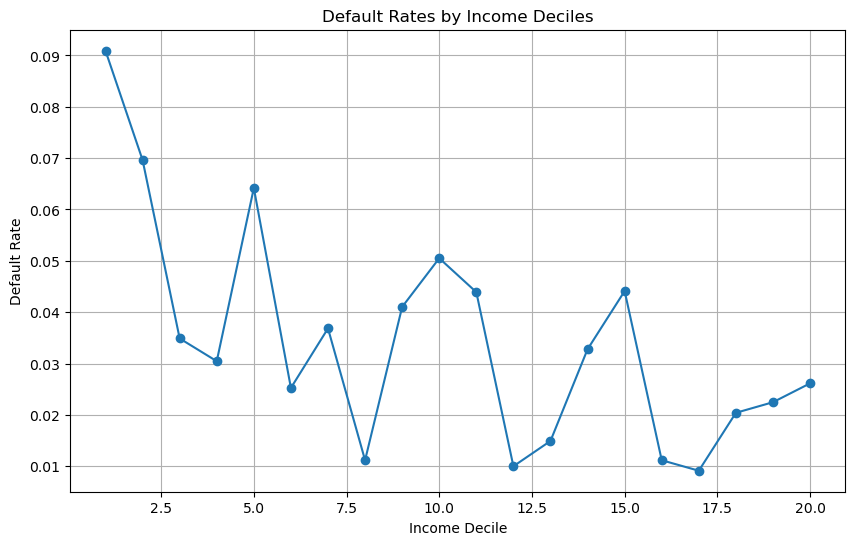

In [19]:
def plot_default_rates_by_income_deciles(df, score_column, nmi_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 20, labels=False) + 1
    default_rates = df.groupby('income_decile')['isFPD'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(default_rates['income_decile'], default_rates['isFPD'], marker='o')
    plt.title('Default Rates by Income Deciles')
    plt.xlabel('Income Decile')
    plt.ylabel('Default Rate')
    plt.grid(True)
    plt.show()
    
plot_default_rates_by_income_deciles(final_df, 'TUrs', 'hb2_nmi')

In [20]:
def create_income_decile_buckets_with_default_rate(df, nmi_column, fpd_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 20, labels=False) + 1
    income_stats = df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    income_stats_interval = df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
    result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
    return result

income_decile_stats = create_income_decile_buckets_with_default_rate(final_df, 'hb2_nmi', 'isFPD')
print("Income Decile Stats with Default Rates")
print(income_decile_stats)

Income Decile Stats with Default Rates
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1538.36    100.0     10.0   1318.442800   
1             2.0  1538.99    1929.88    147.0     11.0   1747.479252   
2             3.0  1932.00    2200.00    166.0      6.0   2069.364157   
3             4.0  2200.20    2444.04    191.0      6.0   2333.050995   
4             5.0  2445.32    2615.94    175.0     12.0   2549.510971   
5             6.0  2617.00    2816.71    193.0      5.0   2734.015751   
6             7.0  2817.73    3033.00    183.0      7.0   2941.778634   
7             8.0  3033.27    3206.64    177.0      2.0   3121.707910   
8             9.0  3206.72    3373.41    187.0      8.0   3285.834813   
9            10.0  3373.55    3553.31    188.0     10.0   3466.214309   
10           11.0  3553.39    3764.66    196.0      9.0   3656.962908   
11           12.0  3765.46    3995.39    198.0      2.0   3877.677222   
12          

In [21]:
correlation_matrix = final_df[['hb2_nmi',  'TUrs', 'bureau_score', 'isFPD']].corr()
print("Correlation Matrix")
correlation_matrix

Correlation Matrix


,hb2_nmi,TUrs,bureau_score,isFPD
hb2_nmi,1.000000,0.018852,0.031432,-0.022203
TUrs,0.018852,1.000000,0.002874,-0.059781
bureau_score,0.031432,0.002874,1.000000,-0.026686
isFPD,-0.022203,-0.059781,-0.026686,1.000000


#### No correlation strong enough - all are very weak  

In [22]:
def create_income_decile_buckets_with_default_rate_by_provider(df, nmi_column, fpd_column, provider_column):
    results = []
    lead_providers = df[provider_column].unique()
    for provider in lead_providers:
        provider_df = df[df[provider_column] == provider].copy()
        provider_df['income_decile'] = pd.qcut(provider_df[nmi_column], 10, labels=False) + 1
        income_stats = provider_df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
        income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
        income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
        income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
        income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
        income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
        income_stats_interval = provider_df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
        result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
        result[provider_column] = provider
        results.append(result)
    final_result = pd.concat(results, ignore_index=True)
    return final_result

income_by_provider = create_income_decile_buckets_with_default_rate_by_provider(final_df, 'hb2_nmi', 'isFPD', 'lead_provider_name')

In [23]:
print("Income with FPD rates by Lead Provider for FORA")
print(income_by_provider)

Income with FPD rates by Lead Provider for FORA
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1950.00    141.0      5.0   1575.955106   
1             2.0  1950.03    2470.00    212.0      5.0   2222.487123   
2             3.0  2470.04    2816.71    240.0      8.0   2649.999625   
3             4.0  2817.73    3188.30    213.0      3.0   3012.974695   
4             5.0  3189.00    3504.44    234.0     10.0   3339.901667   
5             6.0  3504.55    3913.06    242.0     10.0   3711.771198   
6             7.0  3913.39    4441.74    249.0      8.0   4164.089438   
7             8.0  4442.56    5200.08    243.0      7.0   4800.723374   
8             9.0  5202.25    6500.10    265.0      3.0   5829.835094   
9            10.0  6509.96  168952.77    230.0      7.0  10837.310565   
10            1.0   220.00    1700.00     13.0      3.0   1399.516923   
11            2.0  1750.00    2307.58     21.0      5.0   2083.346667   
12 

## Excel

In [ ]:
with pd.ExcelWriter('decile_stats.xlsx', engine='xlsxwriter') as writer:
    tu_decile_stats.to_excel(writer, sheet_name='TU Risk Score', index=False)
    bureau_decile_stats.to_excel(writer, sheet_name='Bureau Score', index=False)
    income_decile_stats.to_excel(writer, sheet_name='Income', index=False)
    
    workbook = writer.book
    header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
    
    for sheet_name in ['TU Risk Score', 'Bureau Score', 'Income']:
        worksheet = writer.sheets[sheet_name]
        
        for col_num, value in enumerate(tu_decile_stats.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        
    for sheet_name in ['Income']:
        worksheet = writer.sheets[sheet_name]
        chart = workbook.add_chart({'type': 'column'})
        chart.add_series({
            'name': 'Default Rate', 'categories': [sheet_name, 1, 0, 10, 0],
            'values': [sheet_name, 1, 5, 10, 5]
        })
        
        chart.set_title({'name': 'Default Rate by Income'})
        chart.set_x_axis({'name': 'Income Decile'})
        chart.set_y_axis({'name': 'Default Rate (%)'})
        
        worksheet.insert_chart('M2', chart)
        
print("Excel Created Successfully")

## DL and Flinks

Use DL (Not really used in Canada/FORA) and Flinks to check trends of defaults by different variables. average_balance for DL, somehow replicate this in Flinks as there is no parameter
- - For flinks:
- check datawork.mk_flinks
- shared.flinks_account_detail
- - For DL:
- shared.bv_report, bv_verification_request
- map all back using base_loan_id on jaglms.lms_base_loans => lead_sequence_id

In [ ]:
iters=5
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT distinct lh.lead_sequence_id, bvr.average_balance, bvr.average_balance_recent, 
                        total_credits, total_debits
    FROM shared.bv_transaction_summary bvts
     JOIN shared.bv_report bvr ON bvr.id = bvts.report_id
     JOIN shared.bv_verification_request bvvr ON bvvr.id = bvr.bv_verification_request_id
     JOIN jaglms.lms_base_loans lbl ON lbl.base_loan_id=bvvr.base_loan_id
     JOIN jaglms.lms_loan_header lh ON lh.loan_header_id = lbl.loan_header_id
    WHERE RIGHT(bvr.account_number_entered, 4) = RIGHT(bvr.account_number_found, 4)
    AND lh.lead_sequence_id IN """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        dl_df = temp.copy()
    else:
        dl_df = pd.concat([dl_df, temp], ignore_index=True)

In [ ]:
dl_df.head()

## 30 dpd. in 90 with hb2_nmi

In [24]:
pd.options.mode.use_inf_as_na = True
days_since_origination = 90
dpd_days = 30

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/3684431059.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [25]:
# NC MK loans originated in 2023 Q3 to 2024 Q2 (Start +1 month for both) 
##Change origination_time range to alter date range
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
data_90 = pd.read_sql("""select
                            lbl.base_loan_id,
                            a.lead_provider_name,
                            mkam.mk_TU_risk_Oct2022_score as TUrs,
                            llh.lead_sequence_id,
                            la.origination_time,
                            llh.entity_name,
                            lpsi.payment_schedule_item_id,
                            lpsi.item_date,
                            lpsi.item_type,
                            lpsi.status as payment_status,
                            lpsi.total_amount,
                            lps.payment_schedule_id,
                            hb2_nmi,
                            #TIMESTAMPDIFF(DAY, la.origination_time, CURDATE()) AS days_since_origination,
                            TIMESTAMPDIFF(DAY, la.origination_time, lpsi.item_date) AS payment_days_since_origination,
                            lbl.loan_amount, 
                            a.UW_STREAM_ID,
                            la.pay_frequency,
                            (select if(lpsi2.status in ('Return', 'MISSED'), 1, 0) from jaglms.lms_payment_schedule_items lpsi2
                            where lpsi2.payment_schedule_id = lps.payment_schedule_id and lps.is_collections!=1 and (lpsi2.item_type != 'C' OR lpsi2.item_type is null) order by item_date limit 1) as isFPD
                            from jaglms.lms_loan_header llh
                            INNER JOIN datawork.mk_application_more mkam on llh.lead_sequence_id = mkam.lead_sequence_id
                            inner join jaglms.lms_base_loans lbl on llh.loan_header_id = lbl.loan_header_id
                            inner join jaglms.lms_payment_schedules lps on lps.base_loan_id = lbl.base_loan_id
                            inner join jaglms.lms_payment_schedule_items lpsi on (lps.payment_schedule_id = lpsi.payment_schedule_id) #and lps.is_collections = 0)
                            inner join dwh.rpt_leads_accepted la on la.lead_sequence_id = llh.lead_sequence_id
                            inner join datawork.mk_application a on llh.lead_sequence_id = a.lead_sequence_id
                            inner join datawork.mk_critical_info mkc on llh.lead_sequence_id = mkc.lead_sequence_id
                            where
                            llh.loan_header_id is not null 
                            and (lpsi.payment_mode != 'CONCESSION' or lpsi.payment_mode is null)
                            and lbl.loan_status !='Pending' 
                            and llh.status not in ('void', 'withdraw', 'Credit Return', 'Closed','closed') 
                            and lpsi.status not in ('scheduled','cancelled','SENT','bypass','Correction','Pending')
                            and la.IsApplicationTest = 0
                            and llh.is_returning = 0
                            and llh.last_name not in ('Schwartzenegger', 'Goler')
                            and la.application_status = 'Originated'
                            and la.origination_time >= '2023-08-02' and la.origination_time <= '2024-05-17'
                            AND la.organization_id =5
                            and TIMESTAMPDIFF(DAY, la.origination_time, lpsi.item_date) <= """+str(days_since_origination)+"""
                            and (lpsi.item_type != 'C' OR lpsi.item_type is null)
                            ;""", con = conn)
conn.close()

print(data_90.shape)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/2904700754.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_90 = pd.read_sql("""select


(17935, 18)


In [26]:
data_90.head()

,base_loan_id,lead_provider_name,TUrs,lead_sequence_id,origination_time,entity_name,payment_schedule_item_id,item_date,item_type,payment_status,total_amount,payment_schedule_id,hb2_nmi,payment_days_since_origination,loan_amount,UW_STREAM_ID,pay_frequency,isFPD
0,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,59229696,2023-10-26,D,cleared,16.20,7392491,3397.0,23,4550.0,85,B,0.0
1,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,59753051,2023-11-09,D,cleared,28.52,7392491,3397.0,37,4550.0,85,B,0.0
2,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,60361444,2023-11-23,D,cleared,63.39,7392491,3397.0,51,4550.0,85,B,0.0
3,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,60915292,2023-12-07,D,cleared,102.51,7392491,3397.0,65,4550.0,85,B,0.0
4,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,61582535,2023-12-21,D,cleared,123.82,7392491,3397.0,79,4550.0,85,B,0.0


In [27]:
data_90['payment_status'] = data_90['payment_status'].str.lower().copy()

In [28]:
print(data_90.shape)
data_90 = data_90[data_90['payment_status'].isin(['return', 'missed', 'cleared'])]
print(data_90.shape)

(17935, 18)
(17935, 18)


In [29]:
data_90.sort_values(['base_loan_id','item_date'],inplace=True)

In [30]:
data_90['item_date'] = pd.to_datetime(data_90['item_date'])

In [31]:
# exclude missed payments after day60 (not enough time to see if they are recovered)
print(data_90.shape)
data_90 = data_90[~ ((data_90.payment_days_since_origination >(days_since_origination-dpd_days)) &
                     (data_90.payment_status.isin(['return','missed'])))]
print(data_90.shape)

(17935, 18)
(17380, 18)


In [32]:
#set 30+dpd as 0 for all payments
data_90['Ever_30DPD_in_90']=0

In [33]:
# if the missed payment is +30 dpd
# look for missed payments, if to payment amount is not paid in the next 30 days
for i in data_90[data_90.payment_status.isin(['return','missed'])].base_loan_id.unique():
    for j in data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed']))].payment_schedule_item_id.unique():
        data_90.loc[((data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)),'Ever_30DPD_in_90']= 1         
        if ((data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['cleared'])) & (data_90.item_date> (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])) & ((data_90.item_date - (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])).dt.days<= dpd_days)].total_amount.sum()) >= data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)].total_amount).bool():
            data_90.loc[((data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)),'Ever_30DPD_in_90']= 0
data_90_label = data_90.groupby(['lead_sequence_id'])['Ever_30DPD_in_90'].max().to_frame()

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/1215208305.py:6: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if ((data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['cleared'])) & (data_90.item_date> (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])) & ((data_90.item_date - (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])).dt.days<= dpd_days)].total_amount.sum()) >= data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)].total_amount).bool():


In [34]:
data_90_label = data_90.groupby(['lead_sequence_id'])['Ever_30DPD_in_90'].max().to_frame()

In [35]:
data_90_label['Ever_30DPD_in_90'].value_counts()

Ever_30DPD_in_90
0    3618
1     190
Name: count, dtype: int64

In [36]:
data_90_label['Ever_30DPD_in_90'].value_counts(dropna=False,normalize=True)

Ever_30DPD_in_90
0    0.950105
1    0.049895
Name: proportion, dtype: float64

In [37]:
data_90_label

,Ever_30DPD_in_90
lead_sequence_id,
2577054165,0
2577331966,0
2577380136,0
2577381055,0
2577393515,0
...,...
2627223132,0
2627223258,0
2627233109,0


In [38]:
final_df_1 = pd.merge(left=final_df, right=data_90_label, on='lead_sequence_id', how='left')

In [ ]:
def create_income_decile_buckets_with_default_rate_by_provider_2(df, nmi_column, fpd_column, provider_column, dpd_column):
    results = []
    lead_providers = df[provider_column].unique()
    for provider in lead_providers:
        provider_df = df[df[provider_column] == provider].copy()
        provider_df['income_decile'] = pd.qcut(provider_df[nmi_column], 10, labels=False) + 1
        income_stats = provider_df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
        income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
        income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
        income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
        income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
        income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
        income_stats_interval = provider_df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
        result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
        result[provider_column] = provider
        dpd_stats = provider_df.groupby('income_decile')[dpd_column].mean().reset_index()
        result = pd.merge(result, dpd_stats, on='income_decile')
        results.append(result)
    final_result = pd.concat(results, ignore_index=True)
    return final_result

income_by_provider_2 = create_income_decile_buckets_with_default_rate_by_provider_2(final_df_1, 'hb2_nmi', 'isFPD', 'lead_provider_name', 'Ever_30DPD_in_90')

In [ ]:
print("Income Stats with Default Rates & 30DPD in 90 by Lead Provider")
print(income_by_provider_2)

In [ ]:
with pd.ExcelWriter('income_stats_by_provider_with_dpd.xlsx', engine='xlsxwriter') as writer:
    lead_providers = income_by_provider_2['lead_provider_name'].unique()
    
    for provider in lead_providers:
        provider_df = income_by_provider_2[income_by_provider_2['lead_provider_name'] == provider]
        provider_df.to_excel(writer, sheet_name=provider, index=False)
        
        workbook = writer.book
        worksheet = writer.sheets[provider]
        header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
        
        for col_num, value in enumerate(provider_df.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        worksheet.set_column('I:I', 20)
        worksheet.set_column('J:J', 20)
from IPython.display import FileLink

FileLink(r'income_stats_by_provider_with_dpd')        
print("Excel Created Successfully")

In [47]:
def create_income_decile_buckets_with_default_rate_2(df, nmi_column, fpd_column, dpd_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 10, labels=False) + 1
    income_stats = df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    income_stats_interval = df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
    result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
    dpd_stats = df.groupby('income_decile')[dpd_column].mean().reset_index()
    result = pd.merge(result, dpd_stats, on='income_decile')
    return result

income_decile_stats_2 = create_income_decile_buckets_with_default_rate_2(final_df_1, 'hb2_nmi', 'isFPD', 'Ever_30DPD_in_90')
print("Income Decile Stats with Default Rates & 30DPD in 90")
print(income_decile_stats_2)

Income Decile Stats with Default Rates & 30DPD in 90
   income_decile      min        max  count_0  count_1        mean_0  \
0            1.0     2.17    1929.88    247.0     21.0   1573.780283   
1            2.0  1932.00    2444.04    357.0     12.0   2210.440308   
2            3.0  2445.32    2816.71    368.0     17.0   2646.275707   
3            4.0  2817.73    3206.64    360.0      9.0   3030.243861   
4            5.0  3206.72    3553.31    375.0     18.0   3376.265067   
5            6.0  3553.39    3995.39    394.0     11.0   3767.880254   
6            7.0  3996.00    4526.24    375.0      9.0   4235.768667   
7            8.0  4528.00    5383.00    372.0     11.0   4909.155780   
8            9.0  5386.00    6846.00    409.0      6.0   5989.791540   
9           10.0  6850.00  398156.00    323.0      8.0  10784.173529   

         mean_1         std_0        std_1  total  default_rate  \
0   1565.340000    249.846578   273.465931  268.0      7.835821   
1   2161.459167    1

## Score Analysis 2

In [ ]:
def create_score_decile_buckets_with_default_rate_by_provider_2(df, score_column, fpd_column, provider_column, dpd_column):
    bucket_edges = [500, 600, 614, 700, 750, 800, 850, 900, 950, 999]
    bucket_labels = range(1, len(bucket_edges))
    
    results = []
    lead_providers = df[provider_column].unique()
    for provider in lead_providers:
        provider_df = df[df[provider_column] == provider].copy()
        provider_df['score_decile'] = pd.cut(provider_df[score_column], bins=bucket_edges, labels=bucket_labels, right=False)
        score_stats = provider_df.groupby(['score_decile', fpd_column])[score_column].agg(['count', 'mean', 'std']).reset_index()
        score_stats_pivot = score_stats.pivot(index='score_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
        score_stats_pivot.columns = ['score_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
        score_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
        score_stats_pivot['total'] = score_stats_pivot['count_0'] + score_stats_pivot['count_1']
        score_stats_pivot['default_rate'] = score_stats_pivot['count_1'] / score_stats_pivot['total'] * 100
        score_stats_interval = provider_df.groupby('score_decile')[score_column].agg(['min', 'max']).reset_index()
        result = pd.merge(score_stats_interval, score_stats_pivot,  on='score_decile')
        result[provider_column] = provider
        dpd_stats = provider_df.groupby('score_decile')[dpd_column].mean().reset_index()
        result = pd.merge(result, dpd_stats, on='score_decile')
        results.append(result)
    final_result = pd.concat(results, ignore_index=True)
    return final_result

tu_score_stats_2 = create_score_decile_buckets_with_default_rate_by_provider_2(final_df_1, 'TUrs', 'isFPD', 'lead_provider_name', 'Ever_30DPD_in_90')
bureau_score_stats_2 = create_score_decile_buckets_with_default_rate_by_provider_2(final_df_1, 'bureau_score', 'isFPD', 'lead_provider_name', 'Ever_30DPD_in_90')

In [ ]:
print("TU Risk Score Stats with Default Rates and 30dpd in90 by Lead Provider")
print(tu_score_stats_2)
#print("\nBureau Score Stats with Default Rates and 30dpd in 90 by Lead Provider")
#print(bureau_score_stats_2)

In [ ]:
with pd.ExcelWriter('score_stats_by_provider_with_dpd.xlsx', engine='xlsxwriter') as writer:
    tu_score_stats_2.to_excel(writer, sheet_name='TU Risk Score Deciles', index=False)
    bureau_score_stats_2.to_excel(writer, sheet_name='Bureau Score Deciles', index=False)
    workbook = writer.book
    
    for sheet_name in ['TU Risk Score Deciles', 'Bureau Score Deciles']:
        worksheet = writer.sheets[sheet_name]
        header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
        
        for col_num, value in enumerate(tu_score_stats_2.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        worksheet.set_column('I:I', 20)
        worksheet.set_column('J:J', 20)

from IPython.display import FileLink

FileLink(r'score_stats_with_dpd_by_provider.xlsx')        
print("Excel Created Successfully")

For TUrs is less than 670 or nmi is less than 2800 for LoansCanada

# FORA Lead Provider Cuts

In [39]:
cuts = {
    'Loans Canada': {'TUrs': 670, 'Income': 2800},
    'LoanConnect': {'TUrs': 630, 'Income': 2300},
    'Borrowell': {'TUrs': 630, 'Income': 1500},
    'Fora Internal': {'TUrs': 630, 'Income': 2300},
    'Smarter Loans': {'TUrs': 630, 'Income': 2800}
}

def apply_cuts_and_calculate_metrics(df, cuts, score_col, income_col, fpd_col, dpd_col, provider_col):
    df = df.dropna(subset=[score_col, income_col, fpd_col, dpd_col])
    
    results = []
    
    for provider, cut in cuts.items():
        provider_df = df[df[provider_col] == provider]
        filtered_df = provider_df[(provider_df[score_col] < cut['TUrs']) | (provider_df[income_col] < cut['Income'])]
        remaining_df = provider_df[(provider_df[score_col] >= cut['TUrs']) & (provider_df[income_col] >= cut['Income'])]
        
        for subset_df, subset_name in zip([filtered_df, remaining_df], ['Meets Threshold', 'Does not Meet Threshold']):
            count = len(subset_df)
            default_rate = subset_df[fpd_col].mean() * 100
            ever_30dpd_in_90_rate = subset_df[dpd_col].mean() * 100
            
            results.append({
                'Lead Provider': provider,
                'Count': count,
                'Default Rate (%)': default_rate,
                'Ever_in_30dpd_in_90 Rate (%)': ever_30dpd_in_90_rate
        })
        
    return pd.DataFrame(results)

cuts_df = apply_cuts_and_calculate_metrics(final_df_1, cuts, 'TUrs', 'hb2_nmi', 'isFPD', 'Ever_30DPD_in_90', 'lead_provider_name')
print(cuts_df)

   Lead Provider  Count  Default Rate (%)  Ever_in_30dpd_in_90 Rate (%)
0   Loans Canada    922          3.253796                      5.965293
1   Loans Canada   1377          2.541757                      3.994190
2    LoanConnect     66         15.151515                     13.636364
3    LoanConnect    175          2.857143                      6.285714
4      Borrowell     44          9.090909                      6.818182
5      Borrowell    343          0.874636                      2.332362
6  Fora Internal    161          9.937888                     11.180124
7  Fora Internal    475          1.263158                      2.736842
8  Smarter Loans     33         15.151515                     18.181818
9  Smarter Loans     50         12.000000                      8.000000


In [40]:
final_df_1

,lead_sequence_id,organization_id,campaign_name,insert_date,decision,rule_description,lead_source_id,lead_provider_name,TUrs,hb2_nmi,...,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD,income_decile,Ever_30DPD_in_90
0,2561895653,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:22:49,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,761.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2561896639,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:33:45,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,703.0,NaN,...,6917311.0,cleared,ach,37.73,1.0,4119923.0,5536113.0,0.0,NaN,NaN
2,2561898457,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:56:37,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,705.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2561900838,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 01:32:09,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,851.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2561902931,5,#FORA-LOANSCANADA-CPF-SF#,2023-08-02 02:06:47,ACCEPT,IDC Pass,2412,Loans Canada,629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,2627481778,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 13:46:28,ACCEPT,IDC Pass,2412,Loans Canada,686.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18748,2627481949,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 13:47:05,ACCEPT,IDC Pass,2412,Loans Canada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18749,2627488040,5,#FORA-CPC-GNBS#,2024-05-17 14:05:51,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2364,Fora Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18750,2627490336,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 14:13:09,ACCEPT,IDC Pass,2412,Loans Canada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df_1.to_csv('fora_data.csv')

In [ ]:
with pd.ExcelWriter('impact_of_cuts_FORA.xlsx', engine='xlsxwriter') as writer:
    cuts_df.to_excel(writer, sheet_name='Impact of Cuts', index=False)
    workbook = writer.book
    worksheet = writer.sheets['Impact of Cuts']
    header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
        
    for col_num, value in enumerate(cuts_df.columns.values):
        worksheet.write(0, col_num, value, header_format)
        
    worksheet.set_column('A:A', 20)
    worksheet.set_column('B:B', 25)        
    worksheet.set_column('C:C', 12)
    worksheet.set_column('D:D', 15)    
    worksheet.set_column('E:E', 20)

from IPython.display import FileLink

FileLink(r'impact_of_cuts_FORA.xlsx')        
print("Excel Created Successfully")

## Including postal/zip code and bankname into df 

In [41]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, bankname, zip
    FROM datawork.mk_application
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    AND organization_id = 5
    AND decision = 'ACCEPT'
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        zip_df = temp.copy()
    else:
        zip_df = pd.concat([zip_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/1250924528.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.3714301586151123
0
(372, 3)
0.3728787899017334
1
(372, 3)
0.3850560188293457
2
(372, 3)
0.387174129486084
3
(372, 3)
0.3709371089935303
4
(372, 3)
0.38705992698669434
5
(372, 3)
0.3852720260620117
6
(372, 3)
0.38220977783203125
7
(372, 3)
0.37426304817199707
8
(372, 3)
0.375258207321167
9
(372, 3)
0.3876678943634033
10
(372, 3)
0.4204080104827881
11
(372, 3)
0.3760058879852295
12
(372, 3)
0.3898439407348633
13
(372, 3)
0.36399102210998535
14
(372, 3)
0.3630030155181885
15
(372, 3)
0.3823668956756592
16
(372, 3)
0.47180819511413574
17
(372, 3)
0.3843250274658203
18
(372, 3)
0.3606131076812744
19
(372, 3)
0.40599894523620605
20
(372, 3)
0.3913688659667969
21
(372, 3)
0.38233208656311035
22
(372, 3)
0.3770267963409424
23
(372, 3)
0.36663389205932617
24
(372, 3)
0.377716064453125
25
(372, 3)
0.39604926109313965
26
(372, 3)
0.3737020492553711
27
(372, 3)
0.3665189743041992
28
(372, 3)
0.3436102867126465
29
(372, 3)
0.3151428699493408
30
(372, 3)
0.3270227909088135
31
(372, 3)
0.2960851192

In [43]:
zip_df.rename(columns={'zip': 'postal_code'}, inplace=True)

In [44]:
def classify_postal_code(postal_code):
    if len(postal_code) > 1 and postal_code[1] =='0':
        return 'rural'
    else:
        return 'urban'

zip_df['classification'] = zip_df['postal_code'].apply(classify_postal_code)

zip_df

,lead_sequence_id,bankname,postal_code,classification
0,2561895653,cibc,L6R3Z1,urban
1,2561896639,TD,P0P2G0,rural
2,2561898457,None,V5R1K6,urban
3,2561900838,None,T7Z0M3,urban
4,2561902931,None,T2A0J4,urban
...,...,...,...,...
18595,2627469254,None,S7L3W8,urban
18596,2627474043,Bank of Nova Scotia,L0R2A0,rural
18597,2627476677,Bank Of Montreal,S0K0A2,rural
18598,2627479793,None,L2M7H2,urban


In [45]:
final_df_2 = pd.merge(left=final_df_1, right=zip_df, on='lead_sequence_id', how='left')

In [53]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT a.lead_sequence_id, a.bankname, b.bank_institution_code
    FROM jaglms.lms_customer_info_flat b
    JOIN datawork.mk_application a ON a.customer_id = b.customer_id
    WHERE a.lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    AND a.organization_id = 5
    AND a.decision = 'ACCEPT'
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        bic_df = temp.copy()
    else:
        bic_df = pd.concat([bic_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_15830/1033802090.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.26277971267700195
0
(372, 3)
0.2704179286956787
1
(372, 3)
0.2748849391937256
2
(372, 3)
0.2622990608215332
3
(372, 3)
0.2590818405151367
4
(372, 3)
0.26256608963012695
5
(372, 3)
0.26619911193847656
6
(372, 3)
0.2660832405090332
7
(372, 3)
0.26438307762145996
8
(372, 3)
0.26821208000183105
9
(372, 3)
0.2758500576019287
10
(372, 3)
0.29310178756713867
11
(372, 3)
0.2839028835296631
12
(372, 3)
0.27729296684265137
13
(372, 3)
0.26340484619140625
14
(372, 3)
0.2638120651245117
15
(372, 3)
0.26852989196777344
16
(370, 3)
0.2756071090698242
17
(372, 3)
0.2633359432220459
18
(372, 3)
0.2567150592803955
19
(372, 3)
0.26436305046081543
20
(372, 3)
0.2577097415924072
21
(372, 3)
0.2578580379486084
22
(372, 3)
0.2610359191894531
23
(372, 3)
0.2577788829803467
24
(372, 3)
0.2580249309539795
25
(372, 3)
0.2627120018005371
26
(372, 3)
0.2567439079284668
27
(372, 3)
0.25801587104797363
28
(372, 3)
0.26207804679870605
29
(372, 3)
0.2575669288635254
30
(372, 3)
0.2551259994506836
31
(372, 3)
0.2544

In [54]:
bic_df

,lead_sequence_id,bankname,bank_institution_code
0,2561895653,cibc,010
1,2561896639,TD,004
2,2561898457,None,002
3,2561900838,None,002
4,2561902931,None,None
...,...,...,...
18591,2627469254,None,None
18592,2627474043,Bank of Nova Scotia,002
18593,2627476677,Bank Of Montreal,001
18594,2627479793,None,None


In [56]:
bic_df['bankname'].str.lower().value_counts()

bankname
td                            1128
cibc                          1124
rbc                            903
td canada trust                831
bmo                            563
                              ... 
conexus                          1
valleyfirst credit union         1
toronto domion                   1
eagle river credit union         1
first ontario credit uniom       1
Name: count, Length: 633, dtype: int64

In [61]:
for i in bic_df.bank_institution_code.unique():
    print(i, bic_df[bic_df.bank_institution_code==i].bankname.str.lower().unique())

010 ['cibc' 'simplii' 'simpli financial ' None 'simplii financial' 'cibc '
 'bank of montreal' 'simplicity financial' 'bmo'
 'canadian imperial bank of commerce' 'cobc' 'rbc' 'simplii finacial'
 'simplii financial ' 'cibc bank' 'simplii finaancial' 'simplii '
 'simplii financial 3l' 'scotiabank' 'simplii finacial '
 'simplli financial' 'simpli financial' 'simpli' 'toronto dominion bank'
 'kingston community credit union' 'simple financial ' 'simply ' 'cibc?s '
 'ciibc' 'simplii finaci' 'td bank' 'td canada trust' 'cibv'
 'integris credit union' ' i c' 'cibc631' 'td' 'simply financial'
 'canadian imperial bank of commerce ' 'royal bank of canada'
 'simplii fiancial' 'scotia bank' 'roshani dhanarajah ' 'annalie martin'
 'canadian imperial banck of commerce' 'simplii  financial' 'nelson chin'
 'pc financial' 'cib' 'royal bank of canada ' 'simplii finalcial'
 'presidents choice' 'cibc  ' 'cicb' 'atb'
 'coastal community credit union ' ' cibc' 'romel amansec' 'conv'
 'canadian imperial bank

In [62]:
final_df_3 = pd.merge(left=final_df_2, right=bic_df, on='lead_sequence_id', how='left')

In [63]:
final_df_3

,lead_sequence_id,organization_id,campaign_name,insert_date,decision,rule_description,lead_source_id,lead_provider_name,TUrs,hb2_nmi,...,customer_id,base_loan_id,isFPD,income_decile,Ever_30DPD_in_90,bankname_x,postal_code,classification,bankname_y,bank_institution_code
0,2561895653,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:22:49,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,761.0,NaN,...,NaN,NaN,NaN,NaN,NaN,cibc,L6R3Z1,urban,cibc,010
1,2561896639,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:33:45,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,703.0,NaN,...,4119923.0,5536113.0,0.0,NaN,NaN,TD,P0P2G0,rural,TD,004
2,2561898457,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 00:56:37,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,705.0,NaN,...,NaN,NaN,NaN,NaN,NaN,None,V5R1K6,urban,None,002
3,2561900838,5,#FORA-LOANSCANADA-CPF-FLINKS#,2023-08-02 01:32:09,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,851.0,NaN,...,NaN,NaN,NaN,NaN,NaN,None,T7Z0M3,urban,None,002
4,2561902931,5,#FORA-LOANSCANADA-CPF-SF#,2023-08-02 02:06:47,ACCEPT,IDC Pass,2412,Loans Canada,629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,None,T2A0J4,urban,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,2627481778,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 13:46:28,ACCEPT,IDC Pass,2412,Loans Canada,686.0,NaN,...,NaN,NaN,NaN,NaN,NaN,None,K0K2T0,rural,None,None
18748,2627481949,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 13:47:05,ACCEPT,IDC Pass,2412,Loans Canada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18749,2627488040,5,#FORA-CPC-GNBS#,2024-05-17 14:05:51,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2364,Fora Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18750,2627490336,5,#FORA-LOANSCANADA-CPF-SF#,2024-05-17 14:13:09,ACCEPT,IDC Pass,2412,Loans Canada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
final_df_3.to_csv('fora_bic_data.csv')